In [7]:
from PIL import Image

Zad 1.1

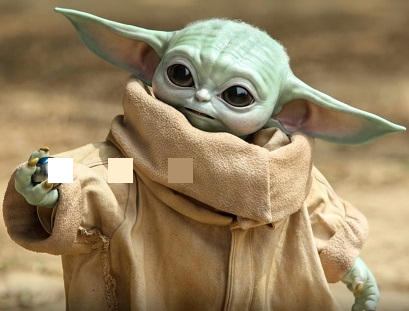

In [8]:
def rysuj_kwadrat_max(obraz, m, n, k):
    obraz1 = obraz.copy()
    pix = obraz.load()
    pix1 = obraz1.load()
    d = int(k / 2)  # Połowa długości boku
    max_color = [0, 0, 0]  # Przechowuje maksymalne wartości RGB

    # Znajdź maksymalne wartości RGB w kwadracie
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            if 0 <= x < obraz.width and 0 <= y < obraz.height:  # Sprawdzanie granic obrazu
                pixel = pix[x, y]
                max_color[0] = max(max_color[0], pixel[0])
                max_color[1] = max(max_color[1], pixel[1])
                max_color[2] = max(max_color[2], pixel[2])

    # Wypełnij kwadrat maksymalną wartością
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            if 0 <= x < obraz.width and 0 <= y < obraz.height:
                pix1[x, y] = tuple(max_color)

    return obraz1

im = Image.open('baby_yoda.jpg')
im2 = im.copy()
kmax = rysuj_kwadrat_max(im2, 60,170,25)
kmax2 = rysuj_kwadrat_max(kmax, 120, 170 ,25)
kmax3 = rysuj_kwadrat_max(kmax2, 180,170,25)
kmax3

![obraz_pierwszy](obraz1.png)

Zad 1.2

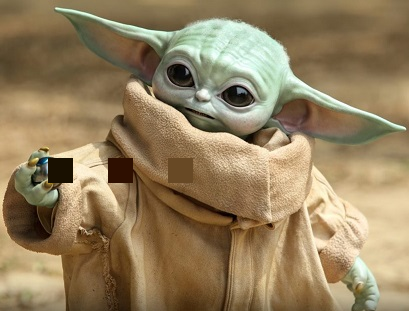

In [9]:
def rysuj_kwadrat_min(obraz, m, n, k):
    obraz1 = obraz.copy()
    pix = obraz.load()
    pix1 = obraz1.load()
    d = int(k / 2)  # Połowa długości boku
    min_color = [255, 255, 255]  # Przechowuje minimalne wartości RGB (maksymalna początkowa wartość)

    # Znajdź minimalne wartości RGB w kwadracie
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            if 0 <= x < obraz.width and 0 <= y < obraz.height:  # Sprawdzanie granic obrazu
                pixel = pix[x, y]
                min_color[0] = min(min_color[0], pixel[0])
                min_color[1] = min(min_color[1], pixel[1])
                min_color[2] = min(min_color[2], pixel[2])

    # Wypełnij kwadrat minimalną wartością
    for a in range(k):
        for b in range(k):
            x = m + a - d
            y = n + b - d
            if 0 <= x < obraz.width and 0 <= y < obraz.height:
                pix1[x, y] = tuple(min_color)

    return obraz1

im3 = im.copy()
kmin = rysuj_kwadrat_min(im3, 60,170,25)
kmin2 = rysuj_kwadrat_min(kmin, 120, 170 ,25)
kmin3 = rysuj_kwadrat_min(kmin2, 180,170,25)
kmin3

![obraz_drugi](obraz2.png)

Zad 2

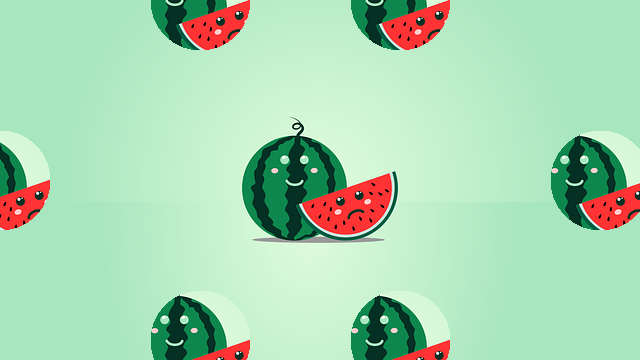

In [10]:
def rysuj_kolo(obraz, m_s, n_s, r, m_docelowy, n_docelowy):
    obraz1 = obraz.copy()  # Tworzymy kopię obrazu
    w, h = obraz.size
    pix = obraz.load()
    pix1 = obraz1.load()

    # Zbieramy piksele z obszaru koła
    pixels_to_copy = []

    for i in range(w):
        for j in range(h):
            if (i - m_s) ** 2 + (j - n_s) ** 2 < r ** 2:  # Piksel należy do oryginalnego koła
                if 0 <= i < w and 0 <= j < h:  # Tylko piksele, które mieszczą się w obrazie
                    pixels_to_copy.append((i - m_s, j - n_s, pix[i, j]))  # Zbieramy piksel i jego przesunięcie

    # Wstawianie skopiowanych pikseli w nowe miejsce (m_docelowy, n_docelowy)
    for dx, dy, color in pixels_to_copy:
        new_x = m_docelowy + dx
        new_y = n_docelowy + dy

        # Przycinanie współrzędnych, żeby nie wyjść poza granice obrazu
        if 0 <= new_x < w and 0 <= new_y < h:
            pix1[new_x, new_y] = color  # Wstawiamy piksel w nowe miejsce

    return obraz1

im = Image.open("obraz.png")
imk = rysuj_kolo(im, 320, 180, 50, 100, 50)
imk.save('obraz3.png')

imk2 = rysuj_kolo(im, 320, 180, 50, 0, 180)
imk3 = rysuj_kolo(imk2, 320, 180, 50, 400, 0)
imk4 = rysuj_kolo(imk3, 320, 180, 50, 400, 340)
imk5 = rysuj_kolo(imk4, 320, 180, 50, 600, 180)
imk6 = rysuj_kolo(imk5, 320, 180, 50, 200, 0)
imk7 = rysuj_kolo(imk6, 320, 180, 50, 200, 340)
imk7

![obraz_trzeci](obraz3.png)

![obraz_czwarty](obraz4.png)

Zad 3

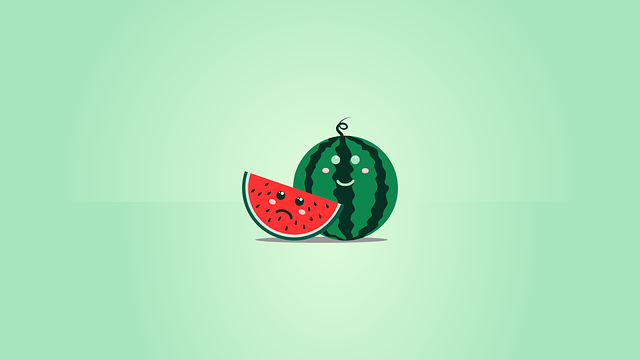

In [11]:
def odbij_w_pionie(im):
    px0 = im.load()
    img = im.copy()
    w, h = im.size
    px = img.load()
    for i in range(w):
        for j in range(h):
            px[i, j] = px0[w - 1- i, j]
    return img
imo = odbij_w_pionie(im)
imo

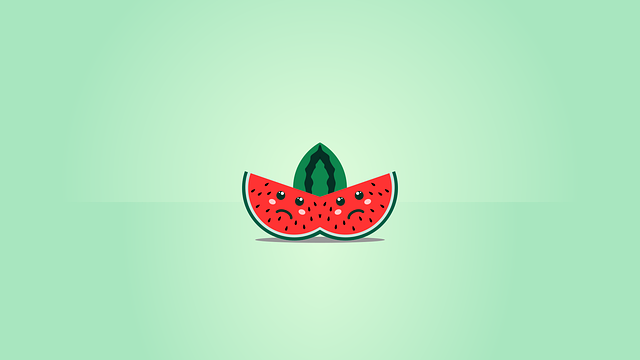

In [12]:
def odbij_w_pionie2(im):
    img = im.copy()
    w, h = im.size
    px = img.load()
    for i in range(w):
        for j in range(h):
            px[i, j] = px[w - 1 - i, j]
    return img
imo = odbij_w_pionie2(im)
imo

W oryginalnej funkcji odbij_w_pionie oryginalne piksele obrazu są przechowywane w zmiennej px0, a modyfikacja obrazu odbywa się na jego kopii, co zapewnia poprawne odwzorowanie odbicia w pionie. Zmodyfikowana wersja nie przechowuje oryginalnych pikseli oddzielnie, lecz modyfikuje piksele bezpośrednio w kopii obrazu. Z tego powodu zmiany dokonane w trakcie iteracji wpływają na wyniki przetwarzania kolejnych pikseli, prowadząc do odbicia po środku obrazu(prawą stronę w lewo).